In [17]:
import os

import pandas as pd
import tqdm
import matplotlib.pyplot as plt
import numpy as np

from generation.config import DATA_DIR
from generation.data.data_preparation import get_attributes_df, \
                                             get_detector_event_df, \
                                             generate_one_signal, \
                                             postprocess_signal

In [4]:
df = get_attributes_df()

In [5]:
events = df['event'].unique()

_EVENT_1 = np.random.choice(events)
_EVENT_2 = np.random.choice(events)
_DETECTOR = 4

df1 = get_detector_event_df(df, event=_EVENT_1, detector=_DETECTOR)
df2 = get_detector_event_df(df, event=_EVENT_2, detector=_DETECTOR)
print(f"Event 1: {_EVENT_1}, event 2: {_EVENT_2}")

Event 1: 18.0, event 2: 0.0


In [6]:
df_concat = pd.concat([df1, df2])

In [7]:
signal_1 = generate_one_signal(df1)
signal_2 = generate_one_signal(df2)
signal_concat = generate_one_signal(df_concat, sample_coef=1)

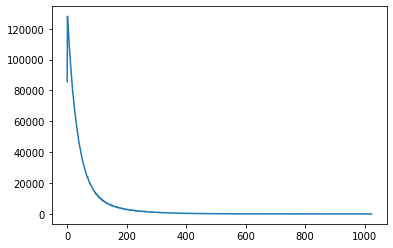

In [8]:
plt.plot(signal_concat)

In [13]:
def get_baseline_prediction(signal):
    half_amplitude = np.min(signal) + (np.max(signal) - np.min(signal)) / 2
    prev = signal[0]
    for idx, item in enumerate(signal):
        if item > half_amplitude:
            return idx

In [22]:
EVENTS_DIR = os.path.join(DATA_DIR, 'shape_analysis')

def get_event_signals(event):
    event_signals = np.load(f'{EVENTS_DIR}/{event}.0.npy')
    return event_signals

In [23]:
event1 = get_event_signals(event=1)